1. Business Understanding

The company is expanding into the aviation industry to diversify its portfolio. Specifically, we’re looking to acquire and operate aircraft for both commercial and private use. 

We shall identify which types of aircraft that pose the lowest risk, analyze various factors such as safety records, maintenance requirements, operational costs, and other risks associated with different aircraft models.

These insights will help them make informed decisions on which aircraft to purchase, minimizing risk and ensuring a successful entry into the aviation market.



Step 1. Loading the data and the relevant packages

In [572]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv('Aviation_Data.csv')

C:\Users\HP\AppData\Local\Temp\ipykernel_49512\1383385705.py:7: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Aviation_Data.csv')


Step 2. We shall now inspect the data frame, get summary info on it i.e the shhape, the aggregates and missing values

In [573]:
#to get the column data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

In [574]:
#we shall see the size of the data
df.shape

(90348, 31)

In [575]:
df.isnull().sum()

Event.Id                   1459
Investigation.Type            0
Accident.Number            1459
Event.Date                 1459
Location                   1511
Country                    1685
Latitude                  55966
Longitude                 55975
Airport.Code              40216
Airport.Name              37644
Injury.Severity            2459
Aircraft.damage            4653
Aircraft.Category         58061
Registration.Number        2841
Make                       1522
Model                      1551
Amateur.Built              1561
Number.of.Engines          7543
Engine.Type                8555
FAR.Description           58325
Schedule                  77766
Purpose.of.flight          7651
Air.carrier               73700
Total.Fatal.Injuries      12860
Total.Serious.Injuries    13969
Total.Minor.Injuries      13392
Total.Uninjured            7371
Weather.Condition          5951
Broad.phase.of.flight     28624
Report.Status              7843
Publication.Date          16689
dtype: i

In [576]:
#We shall get the summary statistics on the columns that have number values.
df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


From the above what we can infer from the data the following;

1. We only have 5 columns containing numerical data
2. We have quite a lot of missing values which we shall need to work through to handle effectively.

Step. 3 cleaning the data by viewing the values, column by column

In [577]:
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [578]:
df['Investigation.Type'].value_counts()

Investigation.Type
Accident      85015
Incident       3874
25-09-2020      702
26-09-2020       60
02-02-2021       39
              ...  
13-09-2021        1
04-08-2021        1
05-08-2022        1
03-11-2020        1
06-01-2021        1
Name: count, Length: 71, dtype: int64

The investigation type column had dates in it, which we shall remove


In [579]:
#to remove Investigation.Type errors
df_e = df[~df['Investigation.Type'].isin(['Accident', 'Incident'])].index

df.drop(df_e, inplace=True)



In [580]:
print(df['Investigation.Type'].value_counts())
print(df.shape)

Investigation.Type
Accident    85015
Incident     3874
Name: count, dtype: int64
(88889, 31)


We have now solved the investigation type errors that had blank rows.
Our df has moved from 90348 rows to 88889 rows

In [581]:
df.isna().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38757
Airport.Name              36185
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1382
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7096
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6384
Publication.Date          15230
dtype: i

Let us proceed to clearing balnks for the plane's make and model


In [582]:
df['Make'].isna().value_counts(normalize=True)

Make
False    0.999291
True     0.000709
Name: proportion, dtype: float64

In [583]:
#We shall filter out rows where 'Make' is NaN
df_emake = df[df['Make'].isna()].index

# Drop rows where the 'Make' column is NaN
df.drop(df_emake, inplace=True)

Now that we've cleaned the make column, we may need to do model as well.

In [584]:
#We shall filter out rows where 'Make' is NaN
df_emodel = df[df['Model'].isna()].index

# Drop rows where the 'Make' column is NaN
df.drop(df_emodel, inplace=True)

In [585]:
df.isna().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     225
Latitude                  54430
Longitude                 54439
Airport.Code              38681
Airport.Name              36117
Injury.Severity             979
Aircraft.damage            3172
Aircraft.Category         56532
Registration.Number        1339
Make                          0
Model                         0
Amateur.Built                99
Number.of.Engines          6023
Engine.Type                7025
FAR.Description           56841
Schedule                  76245
Purpose.of.flight          6138
Air.carrier               72168
Total.Fatal.Injuries      11386
Total.Serious.Injuries    12490
Total.Minor.Injuries      11914
Total.Uninjured            5897
Weather.Condition          4439
Broad.phase.of.flight     27094
Report.Status              6338
Publication.Date          15224
dtype: i

The make column has an error whereby values are case changed i.e cessna vs CESSNA, let'start by having everything in caps letters.

In [586]:
df['Make'] = df['Make'].str.upper()
df['Location'] = df['Location'].str.upper()
df['Country'] = df['Country'].str.upper()
df['Airport.Name'] = df['Airport.Name'].str.upper()
df['Air.carrier'] = df['Air.carrier'].str.upper()



In [587]:
#We shall also drop some irrelevant columns; 
#1. Schedule - Too many missing values and not much data, 
#2. Registration Number - as we may not be buying the specific planes on the list. 
#3. (Country, Location, Airport, Airport code) - We do not see a relationship between accidents and the airport/country. 
#4. Air carrier - Pilots are considered qualified regardless of company
#5. Publication date as this corresponds with the event date +1
#6. (latitute and longtitude columns) as these have plenty missing values and we shall not be plotting geographical data on the accidents.
#7. (broad.phase.of.flight column, number.of.engines, purpose of flight) as this can be random and wont influence much
#8. Weather condition. We cant predict where the planes will be used, pilot shall make judgement
#9. Accident Number - These are indicidual observations with no influence 

In [588]:
df.drop(columns=['Accident.Number','Weather.Condition','Broad.phase.of.flight','Number.of.Engines','Purpose.of.flight','Longitude','Latitude','Publication.Date','Schedule','Registration.Number','Airport.Name','Country','Airport.Code','Location','FAR.Description','Air.carrier'],inplace=True)

In [589]:
#confirming the drop
df.columns

Index(['Event.Id', 'Investigation.Type', 'Event.Date', 'Injury.Severity',
       'Aircraft.damage', 'Aircraft.Category', 'Make', 'Model',
       'Amateur.Built', 'Engine.Type', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Report.Status'],
      dtype='object')

The Injury Severity column has fatal(##) which is a number borrowed from the fatal injuries column, we shall replace these with simply 'Fatal'

In [590]:
#we shall change all the fatal(##) to fatal as the severity is marked in another column
df['Injury.Severity'] = df['Injury.Severity'].replace(
    to_replace=r'(?i)fatal[\W\d]*', 
    value='Fatal',
    regex=True
)

In [591]:
df['Injury.Severity'].value_counts()

Injury.Severity
Non-Fatal      67305
Fatal          17793
Incident        2214
Minor            218
Serious          173
Unavailable       95
Name: count, dtype: int64

We shall fill in the blank values using 'Not mentioned for ease of computing'

In [592]:
df['Injury.Severity'] = df['Injury.Severity'].fillna('Not Mentioned')

We shall do the same for Aircraft category


In [593]:
df['Aircraft.Category'] = df['Aircraft.Category'].fillna('Not Mentioned')

Also for Amateur Built

In [594]:
df['Amateur.Built'] = df['Amateur.Built'].fillna('Not Mentioned')

For the Aircraft damage, mostlikely the blanks point to no damage whatsoever, thus we shall indicate 'No Damage'

In [595]:
df['Aircraft.damage'] = df['Aircraft.damage'].fillna('No Damage')

Let's look at the Total Fatal Injuries, we shall fill na with 0 as a blank may mean that no fatalities were recorded, and we can use mean or median as we dont know the sizes of the cabins and who could have been on the flight

In [596]:

df['Total.Fatal.Injuries'] = df['Total.Fatal.Injuries'].fillna(0)

We shall do the same for the serious, minor and uninjured columns

In [597]:
df['Total.Serious.Injuries'] = df['Total.Serious.Injuries'].fillna(0)
df['Total.Minor.Injuries'] = df['Total.Minor.Injuries'].fillna(0)
df['Total.Uninjured'] = df['Total.Uninjured'].fillna(0)

In [598]:
df.isna().sum()

Event.Id                     0
Investigation.Type           0
Event.Date                   0
Injury.Severity              0
Aircraft.damage              0
Aircraft.Category            0
Make                         0
Model                        0
Amateur.Built                0
Engine.Type               7025
Total.Fatal.Injuries         0
Total.Serious.Injuries       0
Total.Minor.Injuries         0
Total.Uninjured              0
Report.Status             6338
dtype: int64

We need to eliminate cases where we changed 'no damage' yet there were fatalities.

In [ ]:
#For 300
df.loc[df['Total.Fatal.Injuries'] > 300, 'Aircraft.damage'] = 'Destroyed'

In [618]:
#For 200
df.loc[df['Total.Fatal.Injuries'] > 200, 'Aircraft.damage'] = 'Destroyed'

In [619]:
#For 100
df.loc[df['Total.Fatal.Injuries'] > 100, 'Aircraft.damage'] = 'Destroyed'

In [624]:
df['Aircraft.damage'].value_counts()

Aircraft.damage
Substantial    64097
Destroyed      18601
No Damage       3169
Minor           2791
Unknown          119
Name: count, dtype: int64

Alternatively we shall drop probable cause for accident, incidents that more than 0 fatal,serious,and minor injuries

In [599]:
injuries_df1 = df[(df['Total.Fatal.Injuries']>0)|(df['Total.Serious.Injuries']>0)|(df['Total.Minor.Injuries']>0)]

In [600]:
injuries_df2fat = df[(df['Total.Fatal.Injuries']>0)|(df['Total.Serious.Injuries']>0)]

In [610]:
print(injuries_df1.shape,injuries_df2fat.shape)

(40442, 15) (28962, 15)


We need to also clean the report status, that way, the long explanations if attributed to 'Pilot Error', 'Crew Error', 'Engine Error', 'Fuel Error'. Some observations do not point to poor aircraft construction.

#We do for the pilot errors first.
df['Report.Status'] = df['Report.Status'].replace(
    to_replace=r'(?i)\b(?:[^.!?]*?\bpilot?\b[^.!?]*?[.!?])',
    value='Pilot Error', 
    regex=True
)

#again for pilot but captain mentioned.
df['Report.Status'] = df['Report.Status'].replace(
    to_replace=r'(?i)\b(?:[^.!?]*?\bcaptain?\b[^.!?]*?[.!?])',
    value='Pilot Error', 
    regex=True
)

#We do for the crew next.
df['Report.Status'] = df['Report.Status'].replace(
    to_replace=r'(?i)\b(?:[^.!?]*?\bcrew?\b[^.!?]*?[.!?])',
    value='Crew Error', 
    regex=True
)

#we do for Engine problems.
df['Report.Status'] = df['Report.Status'].replace(
    to_replace=r'(?i)\b(?:[^.!?]*?\bEngine?\b[^.!?]*?[.!?])',
    value='Engine Failure', 
    regex=True
)

#Again for the engine but due to lift, Engine failure
df['Report.Status'] = df['Report.Status'].replace(
    to_replace=r'(?i)\b(?:[^.!?]*?\blift?\b[^.!?]*?[.!?])',
    value='Engine Failure', 
    regex=True
)

#we do for fire \'s
df['Report.Status'] = df['Report.Status'].replace(
    to_replace=r'(?i)\b(?:[^.!?]*?\bFire?\b[^.!?]*?[.!?])',
    value='Fire', 
    regex=True
)

#we do for landing gear
df['Report.Status'] = df['Report.Status'].replace(
    to_replace=r'(?i)\b(?:[^.!?]*?\bLanding gear?\b[^.!?]*?[.!?])',
    value='Landing Gear Failure', 
    regex=True
)

#For brake failure
df['Report.Status'] = df['Report.Status'].replace(
    to_replace=r'(?i)\b(?:[^.!?]*?\bBrake?\b[^.!?]*?[.!?])',
    value='Brake Failure', 
    regex=True
)

In [601]:
df['Report.Status'].nunique()

16995

We have now cleaned up the df dataframe. 


Additionally as a side note, I believe we should focus on the most common plane types rather than dive into other niche types, that will be Airplane, Helicopter. we shall merge accident and incident by concat


In [602]:
df_airplane = df[df['Aircraft.Category']=='Airplane']
df_airplane.shape

(27580, 15)

In [603]:
df_helicopter = df[df['Aircraft.Category']=='Helicopter']
df_helicopter.shape

(3435, 15)

In [604]:
df_helicopter.isna().sum()

Event.Id                    0
Investigation.Type          0
Event.Date                  0
Injury.Severity             0
Aircraft.damage             0
Aircraft.Category           0
Make                        0
Model                       0
Amateur.Built               0
Engine.Type               690
Total.Fatal.Injuries        0
Total.Serious.Injuries      0
Total.Minor.Injuries        0
Total.Uninjured             0
Report.Status             862
dtype: int64

VISUALIZATIONS FOR THE DATA


We shall proceed to generate a pairplot to visualize the relationships in the data, before we delve in deeper.

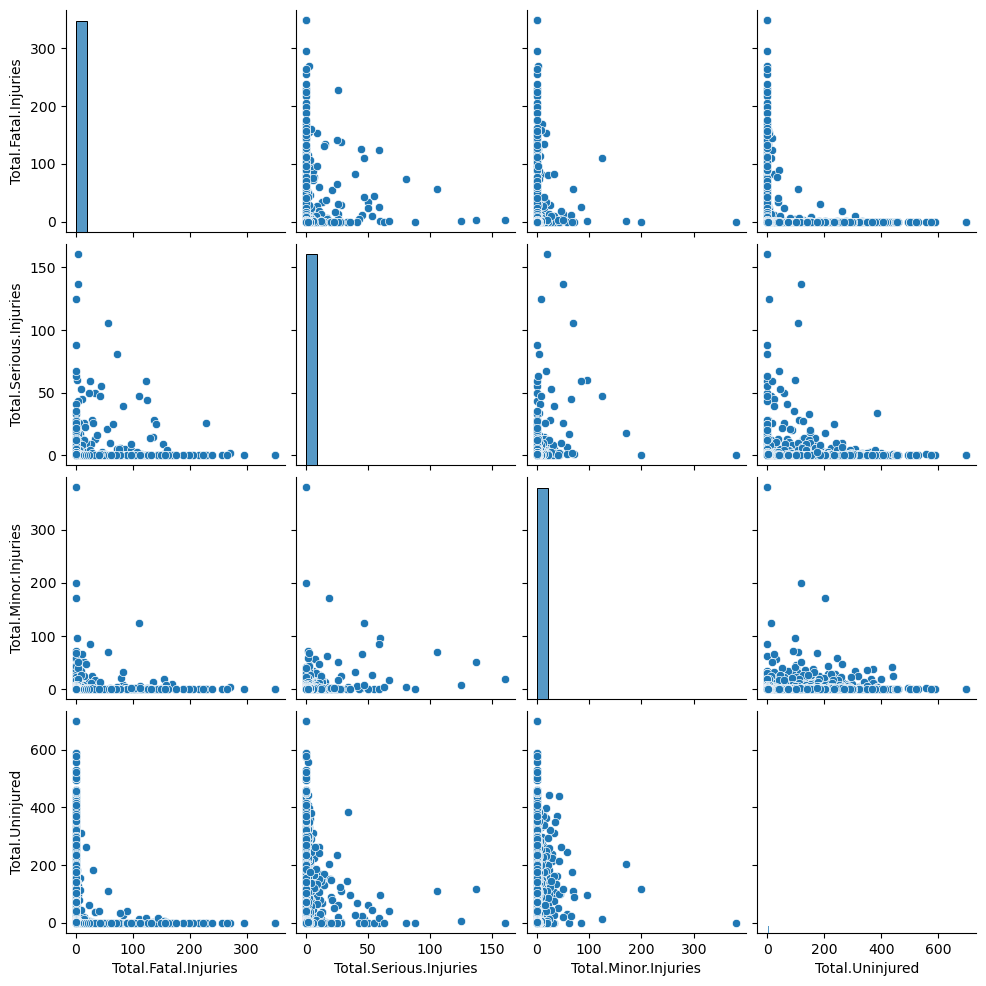

In [605]:
sns.pairplot(df)

We shall now proceed to get the accident/incidence by make

In [606]:
df_airplane.columns

Index(['Event.Id', 'Investigation.Type', 'Event.Date', 'Injury.Severity',
       'Aircraft.damage', 'Aircraft.Category', 'Make', 'Model',
       'Amateur.Built', 'Engine.Type', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Report.Status'],
      dtype='object')

Text(0, 0.5, 'Count')

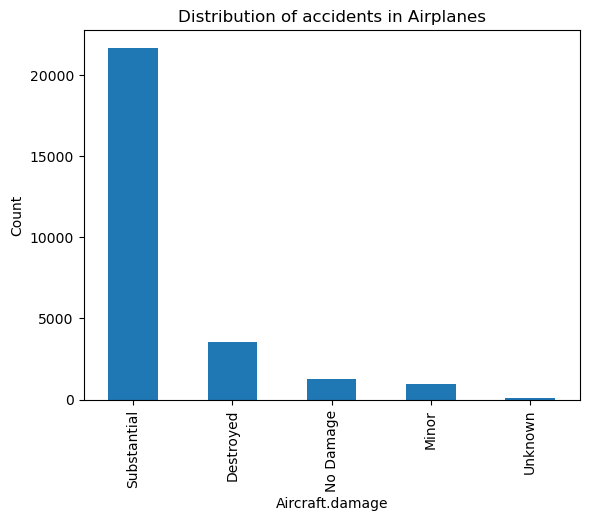

In [607]:
df_airplane['Aircraft.damage'].value_counts().plot(kind='bar')

plt.title('Distribution of accidents in Airplanes')
plt.ylabel('Count')



Text(0, 0.5, 'Count')

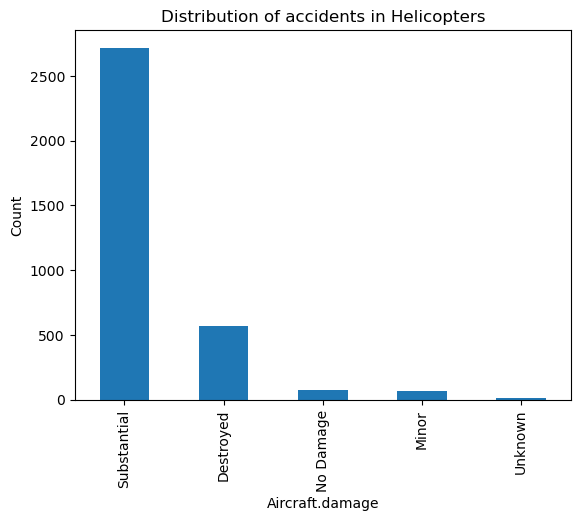

In [608]:
df_helicopter['Aircraft.damage'].value_counts().plot(kind='bar')
plt.title('Distribution of accidents in Helicopters')
plt.ylabel('Count')

From the above, we can see that Airplanes tend to have more accidents than helicopters

In [609]:
df_concat.to_csv('tableau view.csv')